In [1]:
from __future__ import print_function
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten, Merge
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
from keras.datasets import cifar10
import numpy as np
import os

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170475520/170498071 [============================>.] - ETA: 0s

In [23]:
x_train.shape[1:]

(32, 32, 3)

In [26]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [29]:
import matplotlib.pyplot as plt
import PIL.Image as Image

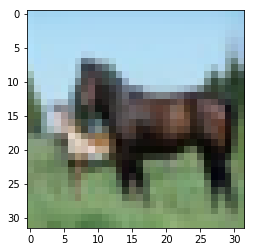

In [17]:
index = 12
red   = Image.fromarray(x_train[index,:,:,0]) #必须调用这个函数，把数组转成image的通道
green = Image.fromarray(x_train[index,:,:,1])
blue  = Image.fromarray(x_train[index,:,:,2])
image = Image.merge("RGB", (red, green, blue)) #把image通道合并成图片
plt.imshow(image)
plt.show()

In [54]:
inp = Input(shape=x_train.shape[1:])
out = Conv2D(32,3)(inp)
out = Conv2D(16,3)(inp)
out = Flatten()(out)
out = Dense(10, activation='softmax')(out)
model = Model(inp,out)
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-4),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
flatten_6 (Flatten)          (None, 14400)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                144010    
Total params: 144,458
Trainable params: 144,458
Non-trainable params: 0
_________________________________________________________________


In [46]:
y_train = keras.utils.to_categorical(y_train, 10)

In [48]:
y_train.shape

(50000, 10)

In [55]:
batch_size = 32
epochs = 200
model.fit(x_train[1:1000,:,:,:],y_train[1:1000,:],batch_size=batch_size, epochs=epochs,verbose=0)

In [56]:
model.evaluate(x_train,y_train)

49984/50000 [============================>.] - ETA: 0s

[14.505845915527344, 0.10000000000000001]